In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/Data_Fitting.csv")

In [ ]:
data

,Data
0,75
1,80
2,20
3,45
4,42
...,...
1316,60
1317,30
1318,25
1319,10


(array([ 20.,  75., 164., 230., 269., 213., 154.,  96.,  76.,  24.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

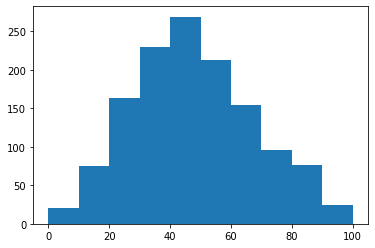

In [ ]:
plt.hist(data['Data'],bins=10)

# Method of Moments Estimate


From the graph of the distribution, it might be reasonable to fit the normal distribution.

So, m1 would be the average of the data points while m2 would be the average of the squares of the datapoints.

So estimator for mean for normal will be m1 while variance will be (m2-m1**2)

In [ ]:
m1=data['Data'].mean()

In [ ]:
a=np.array(data['Data'])

In [ ]:
x=a*a
m2=x.mean()

In [ ]:
mean=m1
var=(m2-m1**2)

In [ ]:
var

395.86371208470155

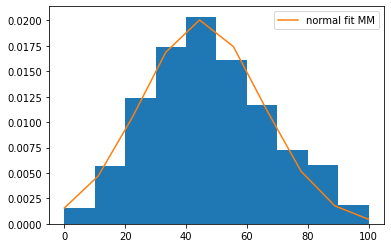

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(a,density=True,bins=10)
xx = np.linspace(0,100,10)
ax.plot(xx, st.norm.pdf(xx,loc=m1,scale=var**0.5),label='normal fit MM')
ax.legend(loc='best')
plt.show()

# Maximum Likelihood Estimate


From Maximum Likelihood Estimate, from theory (as presented in Lecture slides), mean is the same as average of all observed values, while the estimator for variance is given by:

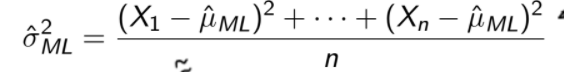

In [ ]:
#First let's calculate mu (estimator for mean)
mu=np.array(data['Data']).mean()

In [ ]:
mu

45.02800908402725

In [ ]:
a=np.array(data['Data'])
a=np.square(a-mu).mean()

In [ ]:
mean=mu
variance=a

In [ ]:
variance

395.8637120847018

In [ ]:
d=np.array(data['Data'])

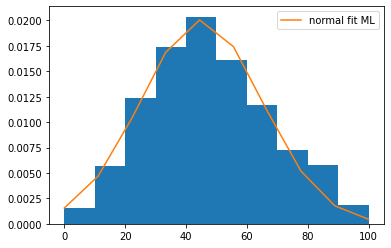

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(d,density=True,bins=10)
xx = np.linspace(0,100,10)
ax.plot(xx, st.norm.pdf(xx,loc=mean,scale=variance**0.5),label='normal fit ML')
ax.legend(loc='best')
plt.show()

# Confidence Intervals using Bootstrapping


In [ ]:
N = 10000
n = 1321
mu_hat = np.zeros(N)
variance_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.norm.rvs(mu,scale=variance**0.5,size=n)
  m1i = np.average(xi); var_2 = np.var(xi)
  mu_hat[i] = m1i; variance_hat[i] = var_2

(array([0.00010608, 0.00081327, 0.00464976, 0.01363104, 0.02367311,
        0.02399134, 0.01453271, 0.00543651, 0.00142322, 0.00014144]),
 array([338.22929148, 349.54170595, 360.85412042, 372.16653489,
        383.47894935, 394.79136382, 406.10377829, 417.41619276,
        428.72860722, 440.04102169, 451.35343616]),
 <a list of 10 Patch objects>)

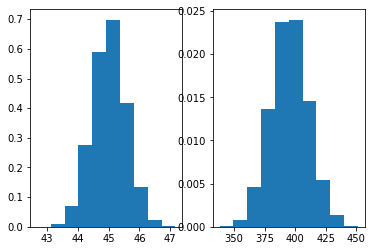

In [ ]:
ax1 = plt.subplot(121)
ax1.hist(mu_hat,density=True)
ax2 = plt.subplot(122)
ax2.hist(variance_hat,density=True)

The plots are approximately normal

In [ ]:
print(np.sqrt(np.var(mu_hat)))
print(np.sqrt(np.var(variance_hat)))

0.550478957658403
15.31432804827866


In [ ]:
del1 = np.percentile(mu_hat -mu, 97.5)
del2 = np.percentile(mu_hat -mu, 2.5)
print([del1,del2])

[1.0692457482643871, -1.0910680529492456]


The 95% confidence interval for mean of normal distribution is [45.02800908402725-1.0692457482643871,45.02800908402725-(-1.0910680529492456)] i.e. [43.95876333576287,46.1190771369765]  

In [ ]:
del1 = np.percentile(variance_hat -variance, 97.5)
del2 = np.percentile(variance_hat -variance, 2.5)
print([del1,del2])

[30.261174494729424, -29.570542841741222]


The 95% confidence interval for variance of normal distribution is [395.8637120847018-30.261174494729424,395.8637120847018-(-29.570542841741222)] i.e. [365.60253758997237, 425.434254926443] 